필기체 숫자데이터를 분류하는 Convolutional Neural Network (CNN) 모델을 만들어봅시다.

train_images <class 'numpy.ndarray'> (60000, 28, 28) uint8
train_labels <class 'numpy.ndarray'> (60000,) uint8
test_images <class 'numpy.ndarray'> (10000, 28, 28) uint8
test_labels <class 'numpy.ndarray'> (10000,) uint8


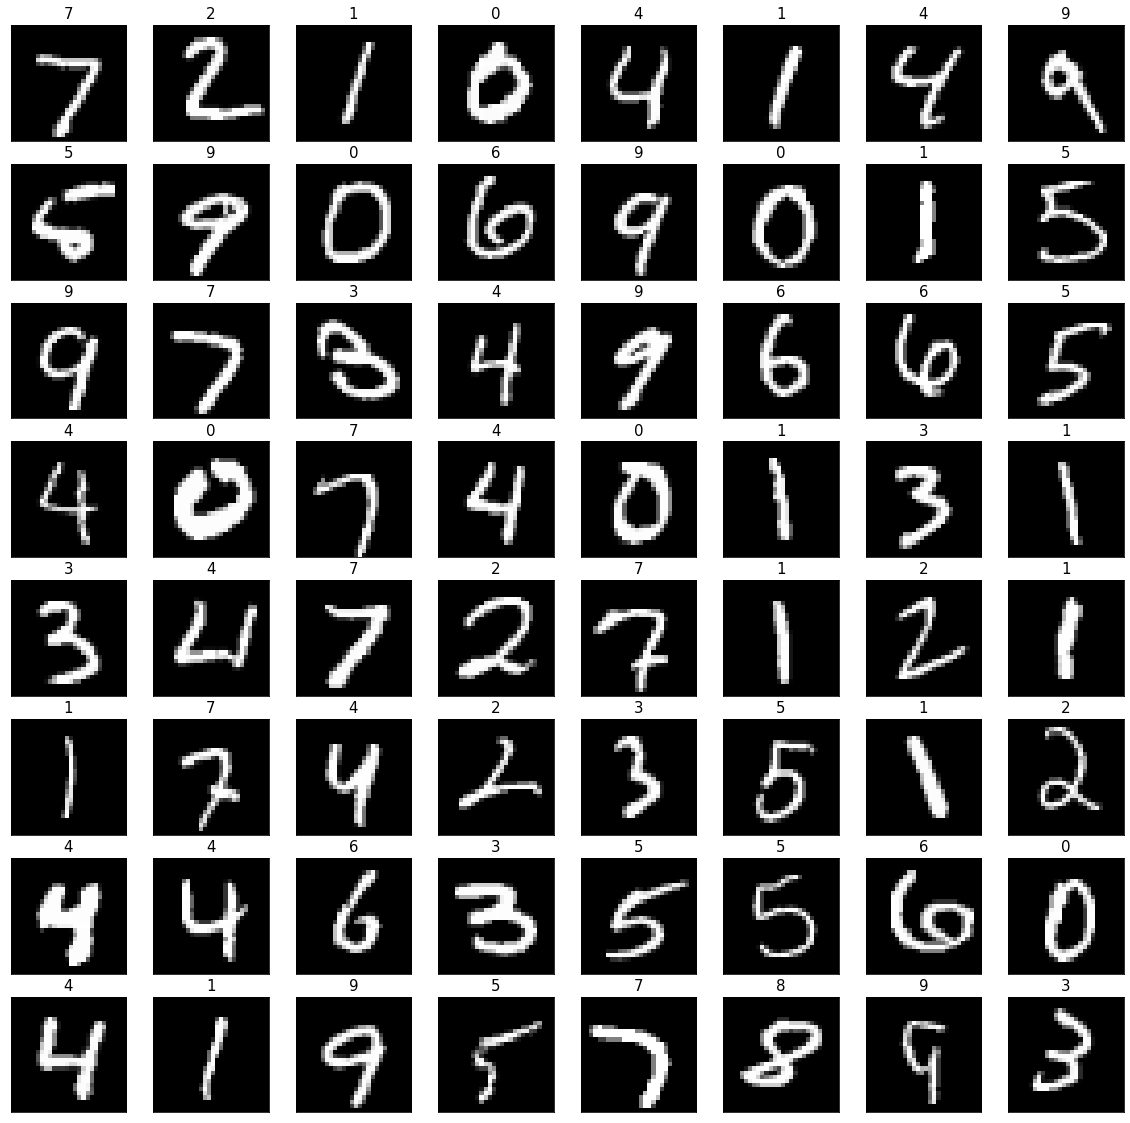

In [1]:
from tensorflow.keras import datasets, layers, models, utils
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print( 'train_images', type(train_images), train_images.shape, train_images.dtype )
print( 'train_labels', type(train_labels), train_labels.shape, train_labels.dtype )
print( 'test_images', type(test_images), test_images.shape, test_images.dtype )
print( 'test_labels', type(test_labels), test_labels.shape, test_labels.dtype )

plt.figure( figsize=(20,20) )
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( test_labels[i], {'fontsize':15} )
    plt.imshow( test_images[i], cmap="gray" )

2차원 이미지를 채널 차원이 있는 3차원 데이터로 만들어 줍니다. backend 의 image_data_format 이 channels_first 인 경우는 (batch, channels, height, width) 로 만들어 주어야하고 channels_last 인 경우는 (batch, height, width, channels) 로 만들어 주어야합니다.. Tensorflow backend 를 사용하는 경우는 channels_last 가 디폴트 옵션입니다. 다음은 이미지 데이터를 channels_first 에 맞추어주는 경우입니다.

In [2]:
K.set_image_data_format( 'channels_first' )
print( K.image_data_format() )

_, H, W = train_images.shape
train_x = ( train_images.reshape(-1, 1, H, W) / 255 ).astype('float32')
test_x = ( test_images.reshape(-1, 1, H, W) / 255 ).astype('float32')
print( 'test_x', type(test_x), test_x.shape, test_x.dtype )

channels_first
test_x <class 'numpy.ndarray'> (10000, 1, 28, 28) float32


레이블을 열개의 카테고리를 가진 데이터로 바꾸어 줍니다.

In [3]:
num_classes = 10

print( 'test_labels', test_labels.shape, test_labels.dtype )
print( 'test_labels[0] =', test_labels[0] )

train_y = utils.to_categorical(train_labels, num_classes)
test_y = utils.to_categorical(test_labels, num_classes)

print( 'test_y', test_y.shape, test_y.dtype )
print( 'test_y[0] =', test_y[0] )

test_labels (10000,) uint8
test_labels[0] = 7
test_y (10000, 10) float32
test_y[0] = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Convolution을 수행하는 Conv2D와 이미지의 크기를 줄이는 MaxPooling2D를 사용하여 모델을 만듭니다. channels_first 로 셋팅을 했으므로 모델 summary 를 보면 Conv2D 출력의 shape 이 (Batch, depth, height, width) 임을 알 수 있습니다.

In [4]:
x = layers.Input(shape=(1, H, W))
h = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
h = layers.MaxPooling2D(pool_size=(2, 2))(h)
h = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(h)
h = layers.MaxPooling2D(pool_size=(2, 2))(h)
h = layers.Flatten()(h)
h = layers.Dense(units=128, activation='relu')(h)
h = layers.Dropout(0.5)(h)
y = layers.Dense(units=num_classes, activation='softmax')(h)

model = models.Model(x,y)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 28, 28)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 26, 26)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 13, 13)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 11, 11)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 5, 5)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928

softmax를 거친 category 출력에 주로 사용하는 categorical_crossentropy loss 함수를 사용합니다. 학습의 중간 결과로 정확성도 출력하기 위하여 accuracy 라는 측정 항목을 지정해 줍니다.

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 5s 94us/sample - loss: 0.3170 - accuracy: 0.9048 - val_loss: 0.0561 - val_accuracy: 0.9833
Epoch 2/15
54000/54000 [==============================] - 3s 62us/sample - loss: 0.0998 - accuracy: 0.9711 - val_loss: 0.0451 - val_accuracy: 0.9872
Epoch 3/15
54000/54000 [==============================] - 3s 63us/sample - loss: 0.0706 - accuracy: 0.9790 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 4/15
54000/54000 [==============================] - 3s 62us/sample - loss: 0.0596 - accuracy: 0.9815 - val_loss: 0.0380 - val_accuracy: 0.9887
Epoch 5/15
54000/54000 [==============================] - 3s 62us/sample - loss: 0.0520 - accuracy: 0.9847 - val_loss: 0.0335 - val_accuracy: 0.9908
Epoch 6/15
54000/54000 [==============================] - 3s 62us/sample - loss: 0.0434 - accuracy: 0.9867 - val_loss: 0.0309 - val_accuracy: 0.9915
Epoch 7/15
54000/54000 [==============================] -

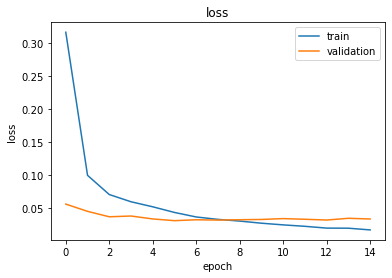

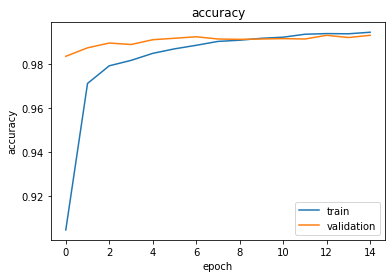

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0215 - accuracy: 0.9932
[loss, accuracy] = [0.021455425311654834, 0.9932]


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y, epochs=15, batch_size=128, validation_split=0.1)

from modules.plot_history import plot_history
plot_history(hist, 'loss')
plot_history(hist, 'accuracy')

evaluation = model.evaluate( test_x, test_y, batch_size=128)
print( '[loss, accuracy] =', evaluation )

검증데이터로 모델에 입력을 넣어 어떠한 출력이 나오는지 확인해봅시다.

y_pred (10000, 10) float32
y_pred[0] [1.3591857e-13 2.4258500e-09 1.0299396e-09 4.5753117e-09 1.8102394e-13
 2.9294950e-13 1.3843570e-18 1.0000000e+00 1.0447794e-12 9.9053477e-09]
class_pred (10000,) int64
class_pred[0] 7


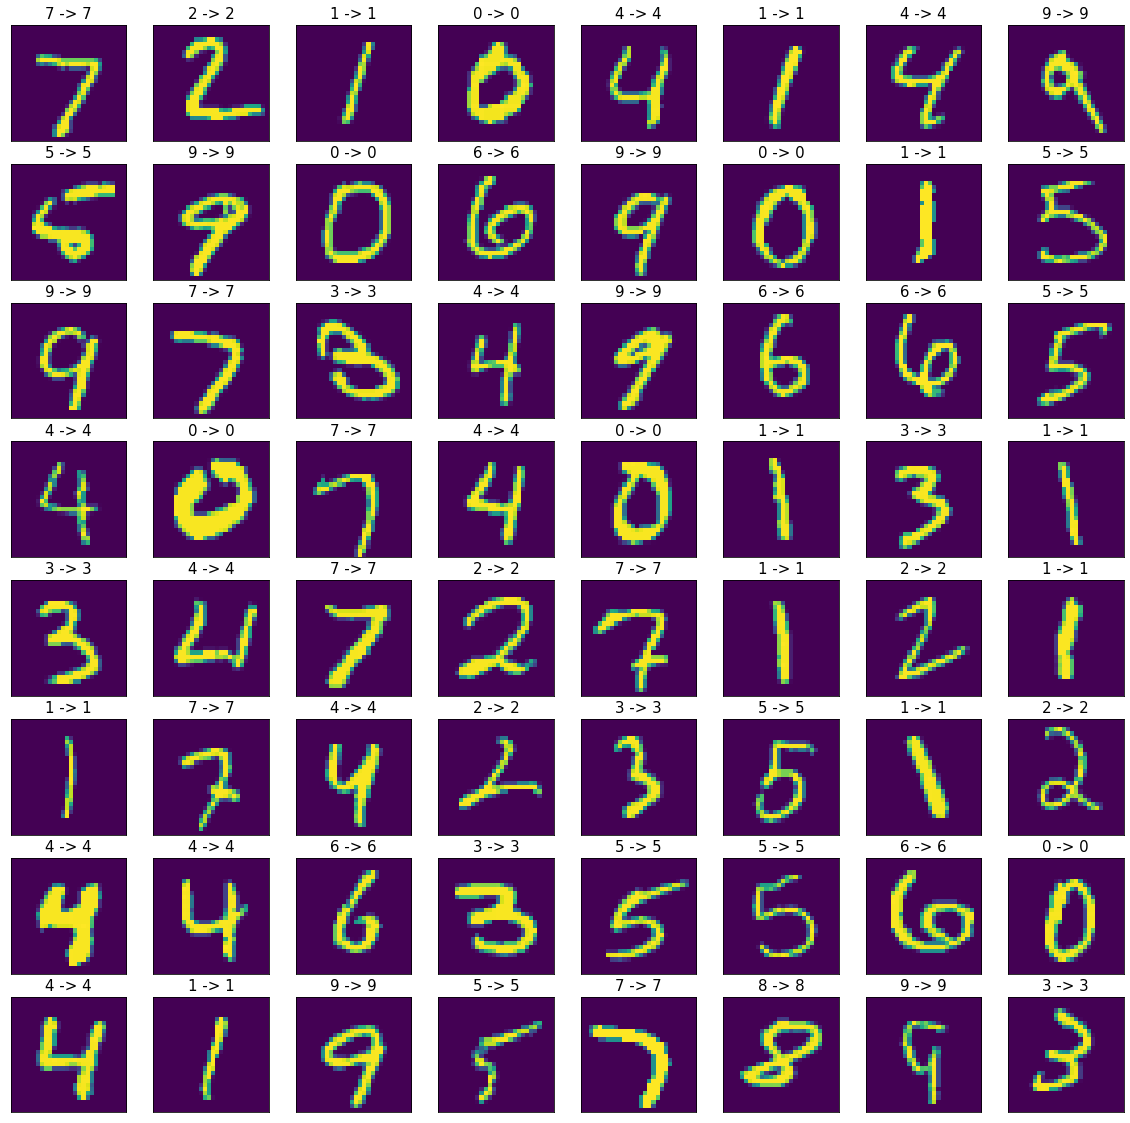

In [6]:
y_pred = model.predict(test_x)
print('y_pred', y_pred.shape, y_pred.dtype)
print('y_pred[0]', y_pred[0])

#class_pred = model.predict_classes( test_x ) # only for sequential model
class_pred = np.argmax(y_pred, axis=1)
print('class_pred', class_pred.shape, class_pred.dtype)
print('class_pred[0]', class_pred[0])

plt.figure( figsize=(20,20) )
for i in range(0,8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( str(test_labels[i]) + ' -> ' + str(class_pred[i]), {'fontsize':15} )
    plt.imshow( test_images[i] )

학습한 모델을 저장합니다.

In [7]:
model.save('mnist_model_channels_first.h5')